In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
url = "https://api.scb.se/OV0104/v1/doris/sv/ssd/START/TK/TK1001/TK1001A/Fordon"

In [3]:
query={
  "query": [
    {
      "code": "Fordonsslag",
      "selection": {
        "filter": "item",
        "values": [
          "PERS"
        ]
      }
    },
    {
      "code": "Bestand",
      "selection": {
        "filter": "item",
        "values": [
          "ITRAF"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2004M01",
          "2005M01",
          "2006M01",
          "2007M01",
          "2008M01",
          "2009M01",
          "2010M01",
          "2011M01",
          "2012M01",
          "2013M01",
          "2014M01",
          "2015M01",
          "2016M01",
          "2017M01",
          "2018M01",
          "2019M01",
          "2021M01",
          "2022M01",
          "2023M01",
          "2024M01"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [4]:
response = requests.post(url, json=query)

In [5]:
if response.status_code == 200:
    data = response.json()
    df = pd.json_normalize(data["data"])
    print(df.columns)
    df.columns = ["Time", "Value"]
    print(df.head(20))
else:
    print("Error:", response.status_code)

Index(['key', 'values'], dtype='object')
                      Time      Value
0   [PERS, ITRAF, 2004M01]  [4065919]
1   [PERS, ITRAF, 2005M01]  [4103138]
2   [PERS, ITRAF, 2006M01]  [4141488]
3   [PERS, ITRAF, 2007M01]  [4194750]
4   [PERS, ITRAF, 2008M01]  [4246211]
5   [PERS, ITRAF, 2009M01]  [4270031]
6   [PERS, ITRAF, 2010M01]  [4291161]
7   [PERS, ITRAF, 2011M01]  [4330356]
8   [PERS, ITRAF, 2012M01]  [4395678]
9   [PERS, ITRAF, 2013M01]  [4435778]
10  [PERS, ITRAF, 2014M01]  [4487658]
11  [PERS, ITRAF, 2015M01]  [4569075]
12  [PERS, ITRAF, 2016M01]  [4666338]
13  [PERS, ITRAF, 2017M01]  [4765285]
14  [PERS, ITRAF, 2018M01]  [4836786]
15  [PERS, ITRAF, 2019M01]  [4859202]
16  [PERS, ITRAF, 2021M01]  [4936954]
17  [PERS, ITRAF, 2022M01]  [4977248]
18  [PERS, ITRAF, 2023M01]  [4967697]
19  [PERS, ITRAF, 2024M01]  [4963333]


In [6]:
data = {
    "Time": [
       ["PERS", "ITRAF", "2004M01"], ["PERS", "ITRAF", "2005M01"], ["PERS", "ITRAF", "2006M01"],
        ["PERS", "ITRAF", "2007M01"], ["PERS", "ITRAF", "2008M01"], ["PERS", "ITRAF", "2009M01"],
        ["PERS", "ITRAF", "2010M01"], ["PERS", "ITRAF", "2011M01"], ["PERS", "ITRAF", "2012M01"],
        ["PERS", "ITRAF", "2013M01"], ["PERS", "ITRAF", "2014M01"], ["PERS", "ITRAF", "2015M01"],
        ["PERS", "ITRAF", "2016M01"], ["PERS", "ITRAF", "2017M01"], ["PERS", "ITRAF", "2018M01"],
        ["PERS", "ITRAF", "2019M01"], ["PERS", "ITRAF", "2021M01"], ["PERS", "ITRAF", "2022M01"],
        ["PERS", "ITRAF", "2023M01"], ["PERS", "ITRAF", "2024M01"]
    ],
    "Value": [[4065919], [4103138], [4141488], [4194750], [4246211], [4270031], [4291161], 
        [4330356], [4395678], [4435778], [4487658], [4569075], [4666338], [4765285], 
        [4836786], [4859202], [4936954], [4977248], [4967697], [4963333]]
}

df = pd.DataFrame(data)

df["Time"] = df["Time"].apply(lambda x: x[-1]) 
df["Value"] = df["Value"].apply(lambda x: x[0]) 

print(df.head(20))

       Time    Value
0   2004M01  4065919
1   2005M01  4103138
2   2006M01  4141488
3   2007M01  4194750
4   2008M01  4246211
5   2009M01  4270031
6   2010M01  4291161
7   2011M01  4330356
8   2012M01  4395678
9   2013M01  4435778
10  2014M01  4487658
11  2015M01  4569075
12  2016M01  4666338
13  2017M01  4765285
14  2018M01  4836786
15  2019M01  4859202
16  2021M01  4936954
17  2022M01  4977248
18  2023M01  4967697
19  2024M01  4963333


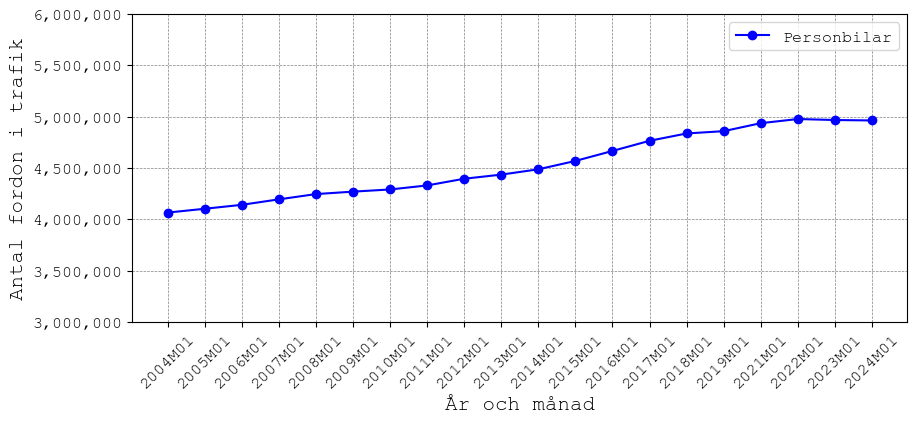

In [34]:
from matplotlib.ticker import StrMethodFormatter, ScalarFormatter

plt.rcParams["font.family"] = "courier new"
plt.rcParams["font.size"] = 12

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(df["Time"], df["Value"], marker='o', linestyle='-', color='b', label='Personbilar')

ax.set_xlabel("År och månad", fontsize=15)
ax.set_ylabel("Antal fordon i trafik", fontsize=15)

ax.set_ylim(3_000_000, 6_000_000)
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,}"))
ax.set_yticks(range(3_000_000, 6_000_001, 500_000)) 
ax.tick_params(axis='x', rotation=45, labelright=False) 
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.legend()

plt.show()